# Final Project (MAT381E-Fall-2022) (REUPLOAD)

**Subject**: Sentiment & Data Analysis of Book Reviews

**Student**: Ecemnur Erman - 090180317 - erman18@itu.edu.tr

NOTE: I forgot to put ", at the end of my explanation on the previous file and it said it's no longer a .json file. That's why I'm reuploading the file. But now with the .csv files and the samples from the dataset. (3 weeks ago)

## Dataset

* I am going to use a dataset from Kaggle which contains 3 million Goodreads user reviews for 212404 unique books ([Kaggle Dataset](https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews))

## Goal

 * The rating that a person gives to a book is sentimentally correlated to what they think of the book--hence their review. Ratings are just numbers (on a scale from a numeric to a numeric, to give the book a 'value' so that it could be compared to either another book or how it's perceieved to others averagely) and reviews are just a bunch of words. Or are they? That's what I aspire to find out."
 * People tend to base their ratings on how they feel about the book, whether they liked it or not, or whether they would recommend it to an another person or not. So in order to measure the accuracy of 'average rating', we should be able to utilize those 'bunch of words' and make sense of them--but mathematically.
 * Like I just explained, reviews and ratings are correlated. So in a world, where we could 'compare' them per se, their same-scaled values should be approximately the same. My project aims to prove this hypothesis.
 * Sentiment Analysis and Natural Language Processing (NLP) are going to be the machine learning methods I will be using. There are libraries in Python which I can utilize (nltk & nltk.sentiment).
 * These libraries contain a lot of words in different languages. Based on the emotion theory in psychology, three types of values are assigned to these words: Positive, Neutral, Negative.
 * My dataset's language is English, so I will use 'English'.
 * My process starts with constructing a list of all the books that were reviewed in this dataset, sort them out based on the average rating they got and show the TOP 100 Books visually (since the dataset is very large and showing all of them visually would be time consuming).
 * And then, I am going to analyze the texts of TOP 100 Books reviews to find out whether they are positive, negative or neutral, by assigning them positive/neutral/negative scores and calculate the average positivity score of each book.
 * After visualizing TOP 100 Books and their positivity scores, I am going to compare the two results to see if the average ratings and the sentimentality of the reviews match.
 * It is presumable that my hypothesis could backfire because of the lack of of the data (NaN values in Book Rating Column etc.), the question that whether the emotion theory really resonates with the assignment of the values to the words or the under-development of NLP techniques in terms of assigning certain values to words.
 * However, NLP & Sentiment Analysis are widely used methods to predict how the text 'sounds' in terms of emotions so I believe that I will get an approximately close result to the actual. 

In [125]:
import pandas as pd
import numpy as np

In [2]:
import opendatasets as od;

In [3]:
od.download("https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews")

Skipping, found downloaded files in "./amazon-books-reviews" (use force=True to force download)


* The first dataset I fetched contains the information in regards to the books' titles, description, author names, images, links, publisher names, publishing date, info links, categories and ratings count.

In [4]:
import os
directory1 = os.path.join('/Users', 'ecemnur.erman', 'Desktop', 'books_data.csv')
books_data = pd.read_csv(directory1, on_bad_lines='skip')
books_data.head(1)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN


* In case there were any NaN values in the dataset, I chose to clean them beforehand, in order not to have problems in further parts of my code.
* Then, I dropped the unrelevant columns of the dataset, as I did not need them.

In [5]:
clean_booksdata = books_data.dropna()
newclean_booksdata = clean_booksdata.drop(columns = ['description', 'authors', 'previewLink', 'publisher', 'publishedDate', 'infoLink', 'categories', 'image'])

* There are a lot of books that have only 1 review with 5.0/4.0/3.0/2.0/1. stars, so in order to get a better analysis, I filtered out books that had less than 150 ratings.

In [86]:
newclean_booksdata[newclean_booksdata['ratingsCount'] > 150]

,Title,ratingsCount
726,The Best Short Stories of Edgar Allan Poe,1180.0
1046,The interpretation of dreams,375.0
1428,One Hundred Years of Solitude,261.0
1705,Pilgrim's Progress,1615.0
3295,Heir to the Throne,2718.0
...,...,...
210467,2176: Birth of the Belt Republic (Belt Republi...,2692.0
211319,Odd girl out,210.0
211766,"I Danced on the Sand: A Memoir of Child Abuse,...",153.0
211860,Shadow Rider,321.0


* The second dataset I fetched contains the information in regards to the reviewed books' ID, title, usernames of the users that reviewed the books, their profile names, the helpfulness ratios of the said reviews, the ratings of the books, time of the reviews, review summaries and actual reviews.

In [7]:
directory2 = os.path.join('/Users', 'ecemnur.erman', 'Desktop', 'Books_rating.csv')
books_ratings = pd.read_csv(directory2, on_bad_lines='skip')
books_ratings.head(1)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...


* I turned the ratings (values of books_ratings['review/score'] column) into float, as I would use them in my further score calculations.
* After that, I  got rid of the NaN values, in order not to face any problems while calculating.

In [8]:
books_ratings['review/score'] = books_ratings['review/score'].astype(float)
clean_booksrating = books_ratings.dropna()
clean_booksrating.head(1)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
10,0829814000,Wonderful Worship in Smaller Churches,19.4,AZ0IOBU20TBOP,Rev. Pamela Tinnin,8/10,5.0,991440000,Outstanding Resource for Small Church Pastors,"I just finished the book, &quot;Wonderful Wors..."


* I did not include this partin my code but as I was sorting the ratings and creating a dataframe set from the highest rated book to the lowest and taking the TOP100, I have observed that since the data is huge, there are a lot of books that got 5.0. Naturally, that made my TOP100 dataframe pointless.
* Then I thought, that I could use the helpfulness ratios of the reviews and make the ratings and the sequence a bit more unique.

* The helpfulness ratio of a review meant, as I understood, for example if the helpfulness ratio of a review is 2/3 then it means 2 people out of 3 found this review helpful and agreed with it.
* As for the reviews that got 0/0 ratio, it meant there is no one that found this useful. But it does not mean that the review itself is not helpful at all. I thought of this as the likes your comments get on Facebook.
* str_to_float() is a function that I wrote, which takes the helpfulness ratio of the reviews (clean_booksrating['review/helpfulness']), parses the string by '/' and names the two part as 'first' and 'second' respectively, turns the two parts into integers and returns it to first/second, a division. In case of the second part being 0, it returns to 0.1 (as a small ratio, since I did not want to dismiss these ratings based on their helpfulness ratio altogether.)

In [9]:
def str_to_float(txt):
    ix = txt.index('/')
    second = int(txt[ix+1:])
    first = int(txt[:ix])
    try:
        return first/second
    except:
        return 0.1

* In this part, I dropped the unnecessary columns and used the str_to_float() function to use the helpfulness ratio of the reviews.

In [10]:
clean_booksrating.drop(columns = ['Price', 'User_id', 'profileName', 'review/time','review/summary'], inplace = True)
clean_booksrating['review/helpfulness'] = clean_booksrating['review/helpfulness'].apply(lambda x: str_to_float(x))

/var/folders/f9/v1tjkrz90_34ny97w2kbrd9w0000gq/T/ipykernel_1747/556685304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_booksrating.drop(columns = ['Price', 'User_id', 'profileName', 'review/time','review/summary'], inplace = True)
/var/folders/f9/v1tjkrz90_34ny97w2kbrd9w0000gq/T/ipykernel_1747/556685304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_booksrating['review/helpfulness'] = clean_booksrating['review/helpfulness'].apply(lambda x: str_to_float(x))


* Here I multiplied the book ratings with helpfulness ratios I obtained. But it was not enough. 

In [88]:
clean_booksrating['score'] = clean_booksrating['review/helpfulness']*clean_booksrating['review/score']
clean_booksrating

/var/folders/f9/v1tjkrz90_34ny97w2kbrd9w0000gq/T/ipykernel_1747/2708709257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_booksrating['score'] = clean_booksrating['review/helpfulness']*clean_booksrating['review/score']


,Id,Title,review/helpfulness,review/score,review/text,score
10,0829814000,Wonderful Worship in Smaller Churches,0.800000,5.0,"I just finished the book, &quot;Wonderful Wors...",4.000000
11,0829814000,Wonderful Worship in Smaller Churches,1.000000,5.0,Many small churches feel like they can not hav...,5.000000
12,0829814000,Wonderful Worship in Smaller Churches,1.000000,5.0,I just finished reading this amazing book and ...,5.000000
13,0829814000,Wonderful Worship in Smaller Churches,1.000000,5.0,I hadn't been a small church pastor very long ...,5.000000
14,0595344550,Whispers of the Wicked Saints,0.636364,1.0,I bought this book because I read some glowing...,0.636364
...,...,...,...,...,...,...
2999953,0786182431,Very Bad Deaths: Library Edition,0.100000,4.0,"""Very Bad Death"" is a so so story, but the cha...",0.400000
2999954,0786182431,Very Bad Deaths: Library Edition,0.100000,5.0,Very Bad Deaths was a very great book! Spider ...,0.500000
2999955,0786182431,Very Bad Deaths: Library Edition,0.100000,3.0,Anything by Spider Robinson is worth reading. ...,0.300000
2999956,0786182431,Very Bad Deaths: Library Edition,0.625000,5.0,Great novel! Easy & enjoyable to read straight...,3.125000


* I counted the amount of reviews each book in my dataset had got. I took the logarithms of the points I obtained in base 2 twice, to get unique and in-the-middle values. As for the values 1 and 2, I wrote two different conditions (since they cause problems in logarithm in base 2).

In [15]:
from math import log2
counts = list(clean_booksrating.groupby('Title').count().Id)
for ix, item in enumerate(counts):
    if item not in [1, 2]:
        counts[ix] = log2(log2(item))
    elif item == 1:
        counts[ix] = 0.64
    else:
        counts[ix] = 0.65

* I grouped the books based on their titles and took the mean of each of their ratings. 
* Then, I turned the result into a dataframe.
* As I would use it later, I turned the obtained dataframe into a dictionary called 'x'.

In [87]:
group_byratings = clean_booksrating.groupby('Title')['score'].mean()
x = dict(group_byratings)

* Now I once again multiplied the converged values and how many reviews the books got, as I took the keys and values of the dictionary x as titles and values and formed a dataframe, in which the scores are in descending order. 

In [72]:
x = dict(group_byratings)
for index, value in enumerate(x):
    x[value] = x[value]*counts[index]

titles = list(x.keys())
vals = list(x.values())
scores = pd.DataFrame(columns = ['title', 'score'])
scores.title = titles
scores.score = vals
scores.sort_values('score', ascending = False)

,title,score
16419,Heal Your Headache: The 1-2-3 Program for Taki...,13.309503
4224,Azucar! The Story of Sugar,12.790082
4578,Be Prepared: A Practical Handbook for New Dads,12.740728
34960,The Amazing Liver & Gallbladder Flush,11.957843
43095,There is Eternal Life for Animals,11.869640
...,...,...
16843,High School Pre-Calculus Tutor (High School Tu...,0.000000
2648,All One Breath,0.000000
19326,Issues in Educational Research,0.000000
21855,Looking for Pythagoras: The Pythagorean Theore...,0.000000


* Since I want to work with the TOP100 books, I took the TOP100.

In [18]:
scores_sorted = scores.sort_values('score', ascending = False)
top100 = scores_sorted.head(100)
top100

,title,score
16419,Heal Your Headache: The 1-2-3 Program for Taki...,13.309503
4224,Azucar! The Story of Sugar,12.790082
4578,Be Prepared: A Practical Handbook for New Dads,12.740728
34960,The Amazing Liver & Gallbladder Flush,11.957843
43095,There is Eternal Life for Animals,11.869640
...,...,...
34221,Tales from the Expat Harem: Foreign Women in M...,9.680448
42467,The Urantia Book: Revealing the Mysteries of G...,9.676585
17687,How to Stop the Pain,9.674926
16822,High Country: A Novel (Literature of the Ameri...,9.652226


In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ecemnur.erman/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ecemnur.erman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [89]:
top100_titlelist = list(top100['title'])

* Here I cleaned clean_booksrating dataframe based on whether the 'Title' column contained the book names of TOP100 dataframe, as I will continue working on TOP100 in my sentiment score calculations.

In [90]:
newclean = clean_booksrating.drop(clean_booksrating[~clean_booksrating['Title'].isin(top100_titlelist)].index)

* I turned the 'review/text' column to string and lower-cased the letters. However, as I was trying to get the reviews and calculate the sentiment scores, I got the error that the types of the reviews were not string.
* So I updated dataframe by adding double quotes at the beginning and the end of every single review in the column.

In [91]:
newclean['review/text'] = newclean['review/text'].astype(str).str.lower()
newclean.update(newclean[['review/text']].applymap('"{}"'.format))
newclean

,Id,Title,review/helpfulness,review/score,review/text,score
39907,0517884070,The Psychic Pathway: A Workbook for Reawakenin...,0.857143,5.0,"""i was guided to this book in 1997 and clicked...",4.285714
39909,0517884070,The Psychic Pathway: A Workbook for Reawakenin...,0.928571,5.0,"""sonia choquette is a skillful psychic and she...",4.642857
39910,0517884070,The Psychic Pathway: A Workbook for Reawakenin...,1.000000,5.0,"""everyone is psychic. this is the fundamental ...",5.000000
39911,0517884070,The Psychic Pathway: A Workbook for Reawakenin...,1.000000,5.0,"""i am more than halfway through this workbook....",5.000000
39913,0517884070,The Psychic Pathway: A Workbook for Reawakenin...,0.923077,5.0,"""i loved this book and will be reading it agai...",4.615385
...,...,...,...,...,...,...
2962495,1569244723,"What's Your Dosha, Baby?: Discover the Vedic W...",0.916667,5.0,"""while reseaching information on ayurveda & do...",4.583333
2962496,1569244723,"What's Your Dosha, Baby?: Discover the Vedic W...",1.000000,5.0,"""as a volunteer at the chopra center for many ...",5.000000
2962497,1569244723,"What's Your Dosha, Baby?: Discover the Vedic W...",1.000000,5.0,"""what a fun way to introduce people to ayurved...",5.000000
2962498,1569244723,"What's Your Dosha, Baby?: Discover the Vedic W...",1.000000,5.0,"""when i got this book i had just hoped to get ...",5.000000


* With the help of SentimentIntensityAnalysis(), I tokenized the reviews sentence by sentence and put them in a dictionary called 'u', then a list called 'res'. 
* The dictionary 'u' contained: The title of the book that got the review, one of the tokenized sentence from the review and as the for loop went on for every sentence, the negative-positive-neutral-compound values of the review.
* Then I turned the list into a dataframe, in order to see all the values more clearly.

In [23]:
sia = SentimentIntensityAnalyzer()
res = []
for review in newclean['review/text']:
    sentences = sent_tokenize(review)
    for x in sentences:
        u = {'title': newclean.loc[newclean.index[newclean['review/text'] == review], 'Title'].iloc[0], 'sentence': x}
        u.update(sia.polarity_scores(x))
        res.append(u)
        
sentiment_table = pd.DataFrame(res)
sentiment_table

,title,sentence,neg,neu,pos,compound
0,The Psychic Pathway: A Workbook for Reawakenin...,"""i was guided to this book in 1997 and clicked...",0.000,1.000,0.000,0.0000
1,The Psychic Pathway: A Workbook for Reawakenin...,"it is truly a wonderful, practical guide to pe...",0.000,0.670,0.330,0.9565
2,The Psychic Pathway: A Workbook for Reawakenin...,she is a gifted and inspiring person and this ...,0.000,0.773,0.227,0.5267
3,The Psychic Pathway: A Workbook for Reawakenin...,what has been strange is that following her te...,0.080,0.800,0.120,0.2263
4,The Psychic Pathway: A Workbook for Reawakenin...,at a seminar a few years ago i sensed immense ...,0.182,0.818,0.000,-0.2500
...,...,...,...,...,...,...
54244,"What's Your Dosha, Baby?: Discover the Vedic W...","however, after reading it, i'm amazed by the w...",0.000,0.610,0.390,0.7506
54245,"What's Your Dosha, Baby?: Discover the Vedic W...",deepak chopra has rightly said on the front pa...,0.000,0.909,0.091,0.5267
54246,"What's Your Dosha, Baby?: Discover the Vedic W...",i totally agree with his words and word like t...,0.000,0.575,0.425,0.9115
54247,"What's Your Dosha, Baby?: Discover the Vedic W...","""lisa marie does an amazing job of taking anci...",0.000,0.705,0.295,0.7717


* The 'compound' value is the assigned value in terms of the negative, positive and neutral points the sentence had got. It is between the interval [-1,1].
* I grouped the sentiment_table dataframe by the book titles and took the mean of compound values.

In [118]:
sentiment = sentiment_table.groupby('title')['compound'].mean()
y = dict(sentiment)

* In the following cell, I created another final dataframe (sentimentscores_last) for the sentiment score for each book, the score varying in between the interval [-1,1].

In [119]:
titles_y = list(y.keys())
vals_y = list(y.values())
sentiment_score = pd.DataFrame(columns = ['title', 'score'])
sentiment_score.title = titles_y
sentiment_score.score = vals_y
sentimentscores_last = sentiment_score.sort_values('score', ascending = False)
sentimentscores_last

,title,score
32,High Country: A Novel (Literature of the Ameri...,0.468020
46,Leaves of Red and Gold: The Journey of Matthew...,0.456883
14,Blessings:: Adventures of a Madcap Christian S...,0.437745
9,Animal Prayer Guide,0.434128
53,Owen & Mzee: The True Story of a Remarkable Fr...,0.430816
...,...,...
71,"The Gulag Archipelago, VOLUME 2: An Experiment...",-0.050989
61,Should I Be Tested for Cancer?: Maybe Not and ...,-0.074270
56,Phantom Soldier: The Enemy's Answer to U.S. Fi...,-0.080004
4,Afghanistan: A Russian Soldier's Story,-0.085113


In [114]:
import matplotlib.pyplot as plt

* One of my initial goals was to show the TOP100 results visually for both dataframes I obtained and compare the results.
* The following two cells do just that.

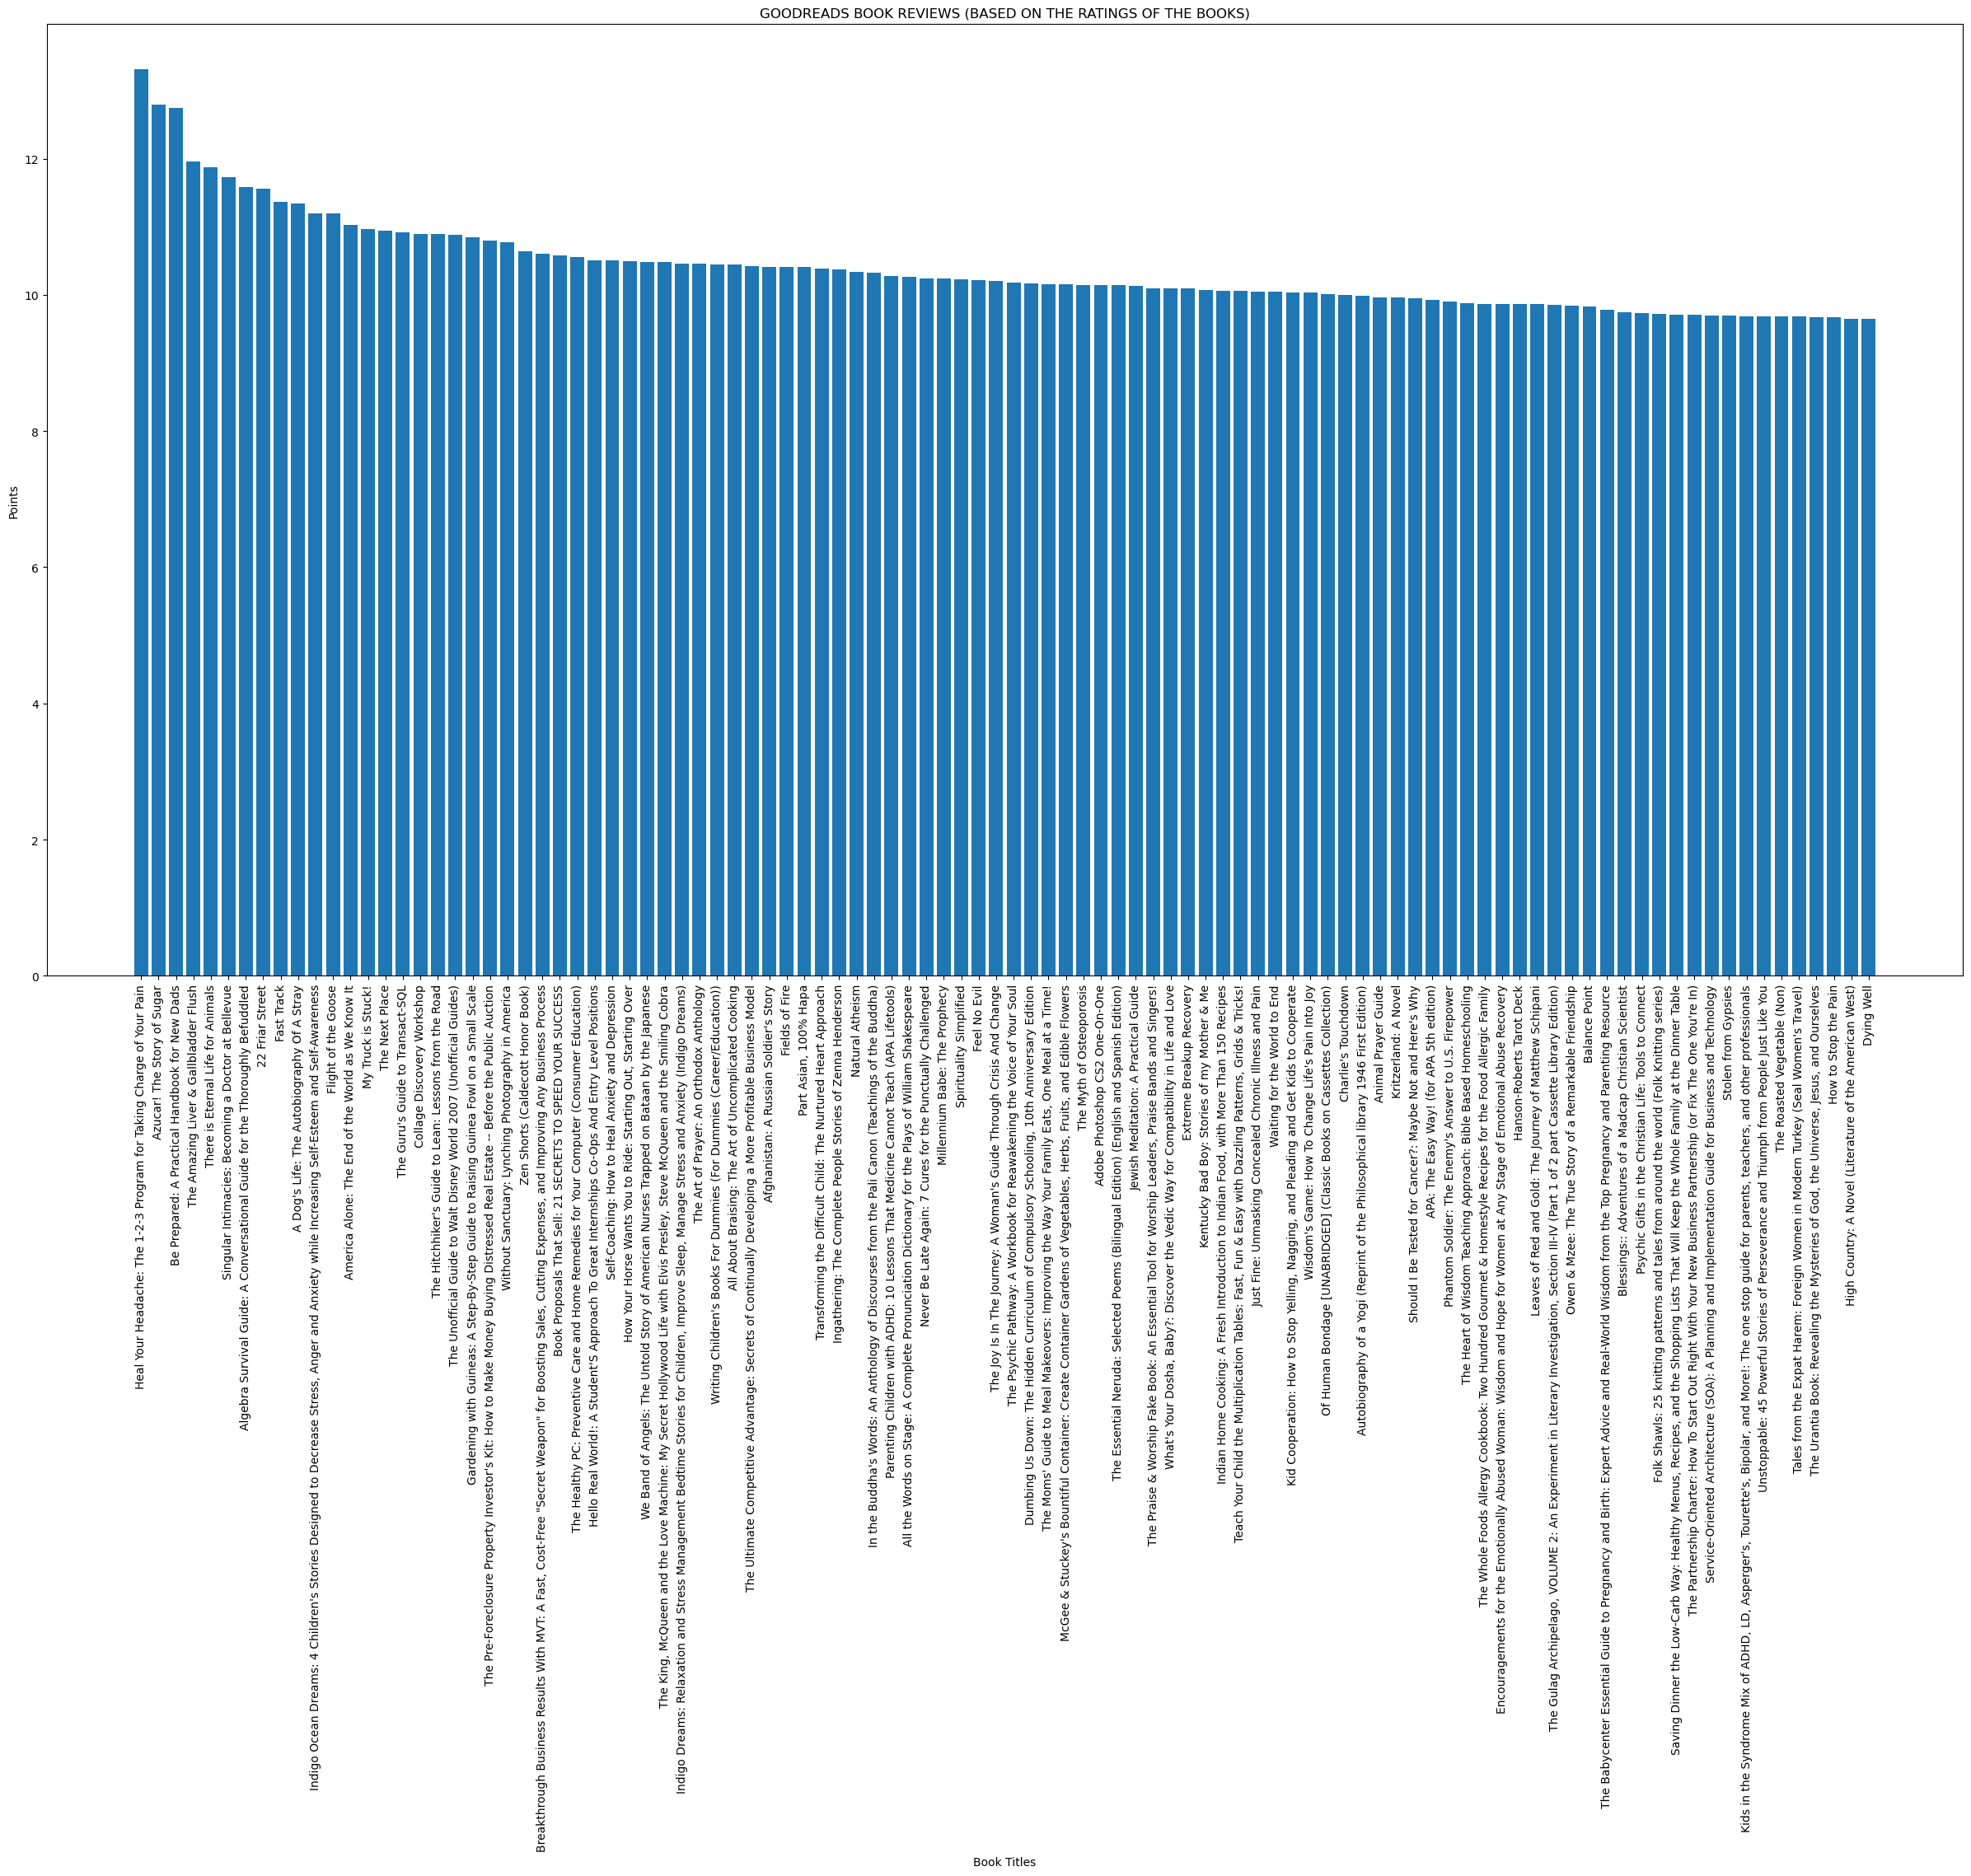

In [121]:
plt.figure(figsize = (30,15));
labels1 = list(top100['title'])
values1 = top100['score']
plt.bar(labels1, values1)
plt.xlabel('Book Titles')
plt.ylabel('Points')
plt.title('GOODREADS BOOK REVIEWS (BASED ON THE RATINGS OF THE BOOKS)')
plt.xticks(rotation = 90);

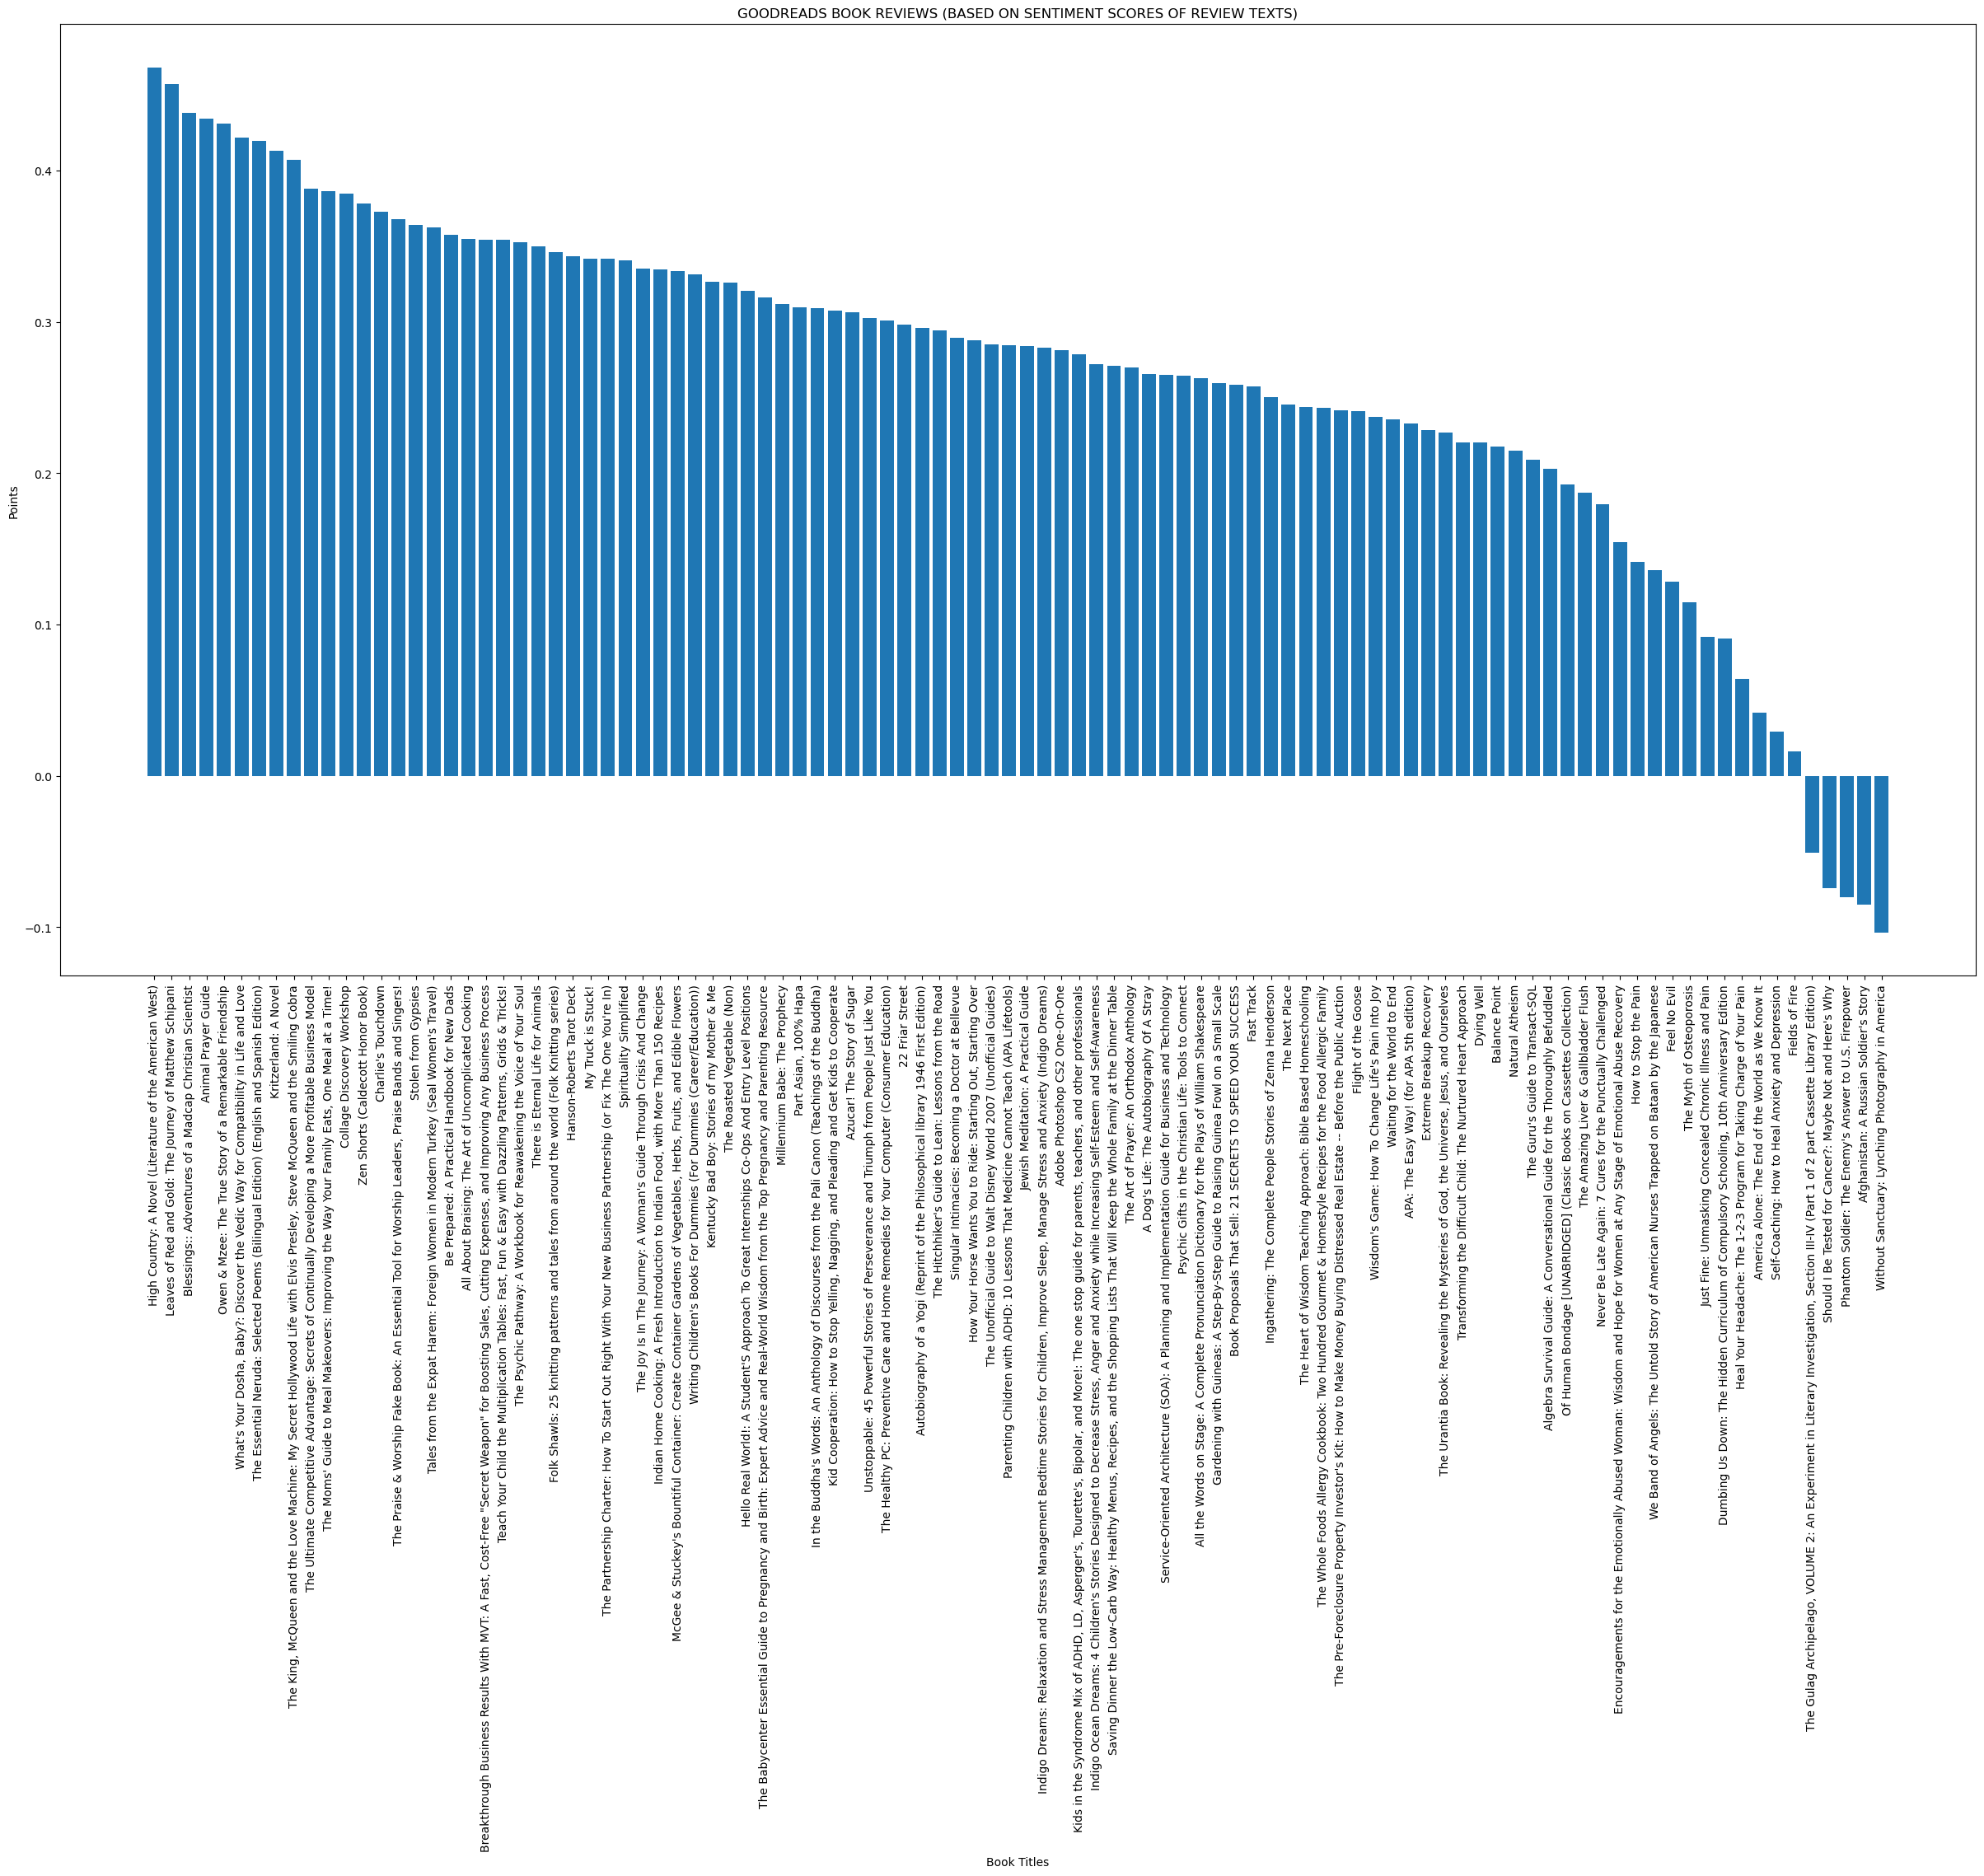

In [117]:
plt.figure(figsize = (30,15));
labels = sentimentscores_last['title']
values = sentimentscores_last['score']
plt.bar(labels, values)
plt.xlabel('Book Titles')
plt.ylabel('Points')
plt.title('GOODREADS BOOK REVIEWS (BASED ON SENTIMENT SCORES OF REVIEW TEXTS)')
plt.xticks(rotation = 90);

* Showing TOP100 was not realistic at all, as TOP100 is fairly a big number of datas to put into a bar chart. Honestly, it looks crazy. You cannot observe whether the order of the books in two dataframes is similar or not at all. 
* Since it will be humnaly possible to observe the differences and overall results of the both dataframes, I decided to comment on only TOP10.

In [122]:
top100.head(10)

,title,score
16419,Heal Your Headache: The 1-2-3 Program for Taki...,13.309503
4224,Azucar! The Story of Sugar,12.790082
4578,Be Prepared: A Practical Handbook for New Dads,12.740728
34960,The Amazing Liver & Gallbladder Flush,11.957843
43095,There is Eternal Life for Animals,11.869640
32112,Singular Intimacies: Becoming a Doctor at Bell...,11.725805
2556,Algebra Survival Guide: A Conversational Guide...,11.586325
350,22 Friar Street,11.554706
13261,Fast Track,11.364016
812,A Dog's Life: The Autobiography Of A Stray,11.345627


In [124]:
sentimentscores_last.head(10)

,title,score
32,High Country: A Novel (Literature of the Ameri...,0.468020
46,Leaves of Red and Gold: The Journey of Matthew...,0.456883
14,Blessings:: Adventures of a Madcap Christian S...,0.437745
9,Animal Prayer Guide,0.434128
53,Owen & Mzee: The True Story of a Remarkable Fr...,0.430816
95,"What's Your Dosha, Baby?: Discover the Vedic W...",0.421465
70,The Essential Neruda: Selected Poems (Bilingua...,0.419402
45,Kritzerland: A Novel,0.412743
77,"The King, McQueen and the Love Machine: My Sec...",0.407100
86,The Ultimate Competitive Advantage: Secrets of...,0.388178


* As it is clear to observe, the two dataframes have nothing to do with each other, which is still kind of shocking for me. As I had written in my 'Goals' section of my Project Proposal, I thought the result would be approximately the same. Honestly, I was pretty sure that the order of the two dataframes would be similar.
* I do not know if it is because of the fact that I used the helpfulness ratio of the reviews to create difference among book ratings or not, but my hypothesis clearly backfired. 